        n  mean_x  mean_y  var_x  var_y  std_x  std_y  cov_xy  corr_xy  slope  \
I    11.0     9.0   7.501   11.0  4.127  3.317  2.032   5.501    0.816    0.5   
II   11.0     9.0   7.501   11.0  4.128  3.317  2.032   5.500    0.816    0.5   
III  11.0     9.0   7.500   11.0  4.123  3.317  2.030   5.497    0.816    0.5   
IV   11.0     9.0   7.501   11.0  4.123  3.317  2.031   5.499    0.817    0.5   

     intercept  rsquare  
I        3.000    0.667  
II       3.001    0.666  
III      3.002    0.666  
IV       3.002    0.667  


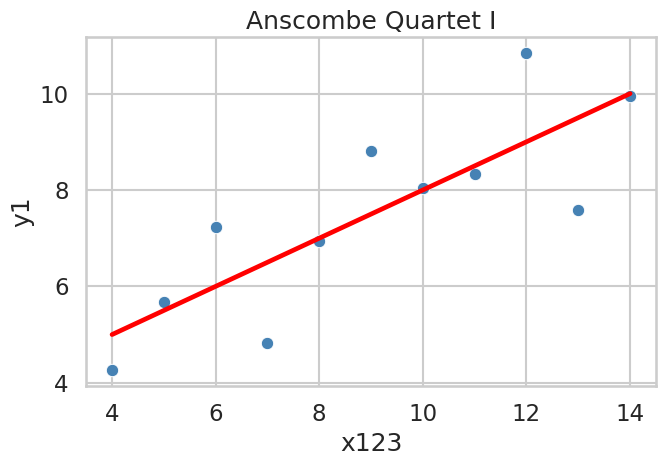

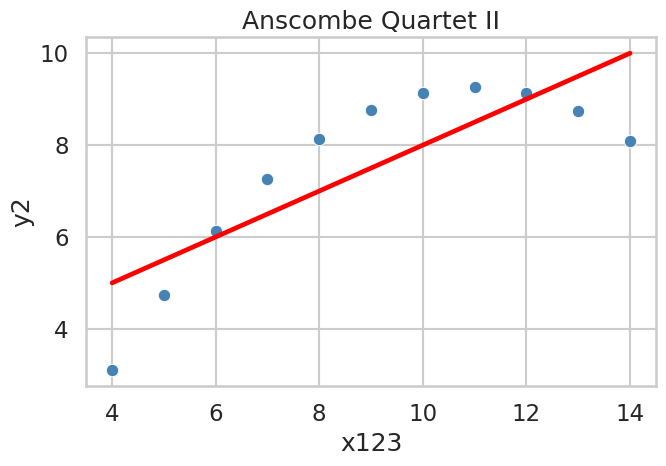

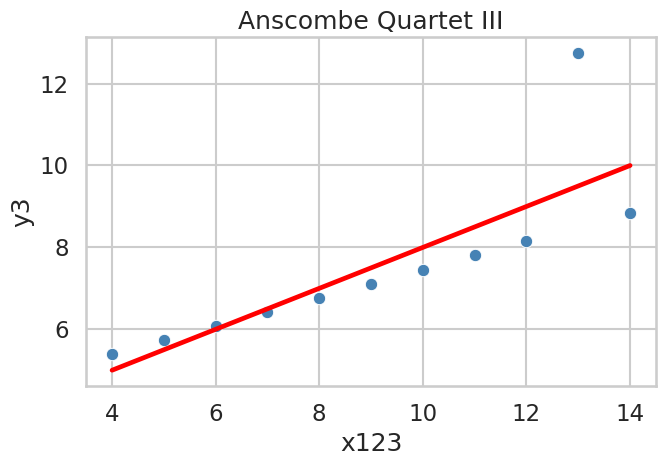

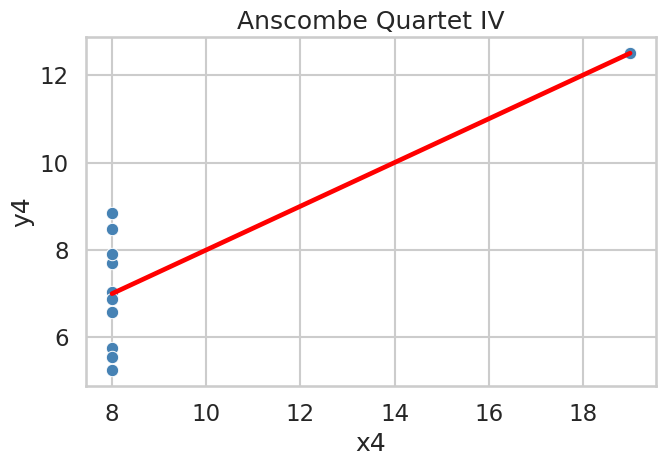

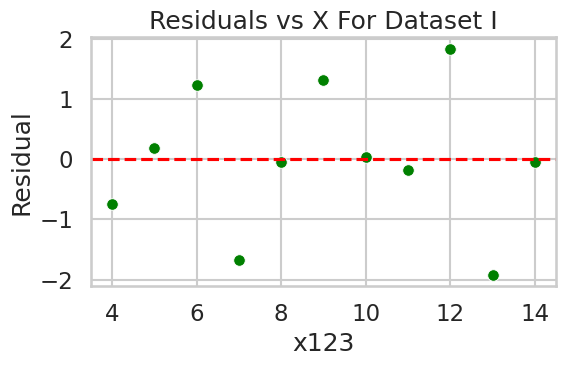

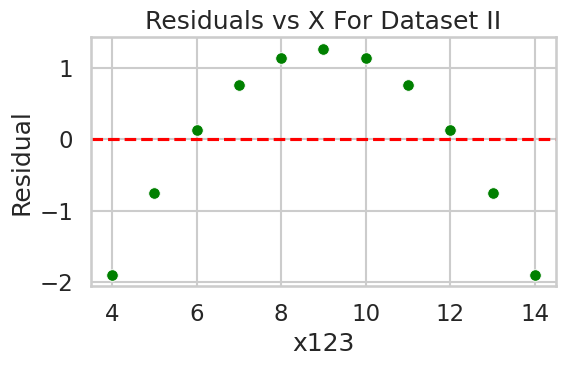

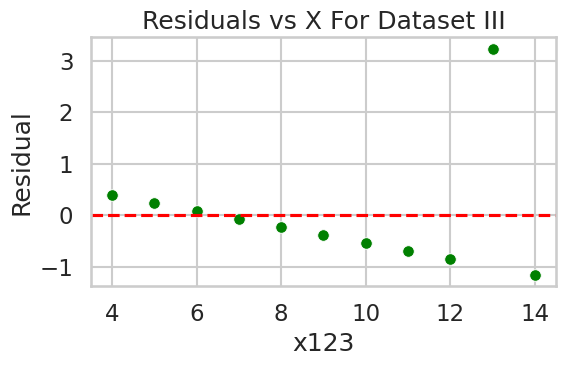

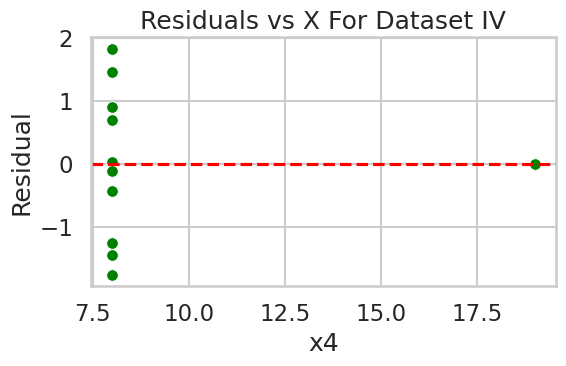

Now running: I x123 y1
Now running: II x123 y2
Now running: III x123 y3
Now running: IV x4 y4


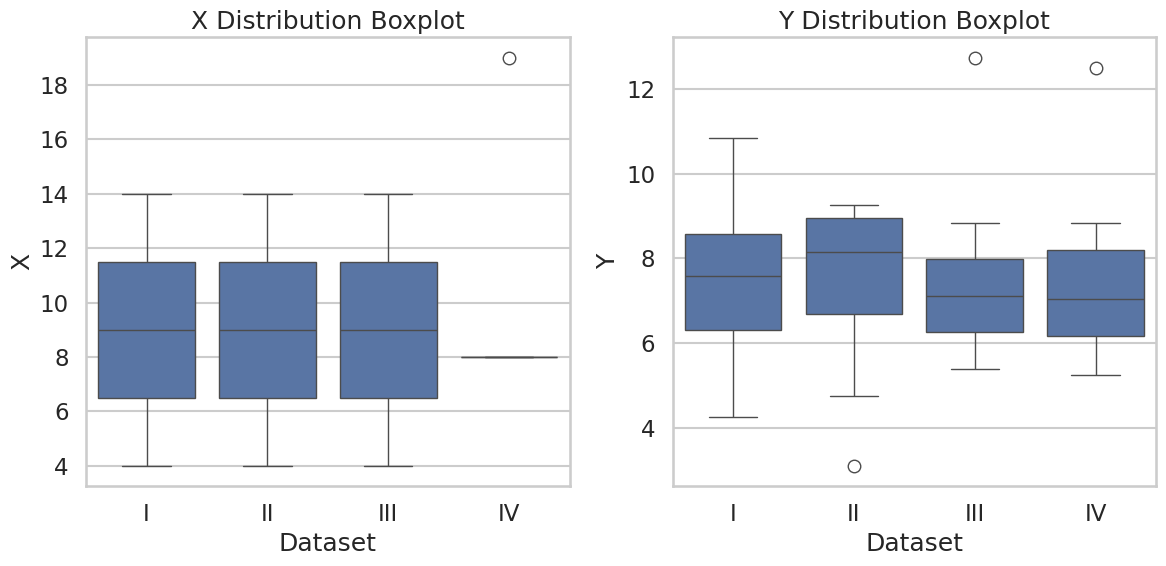

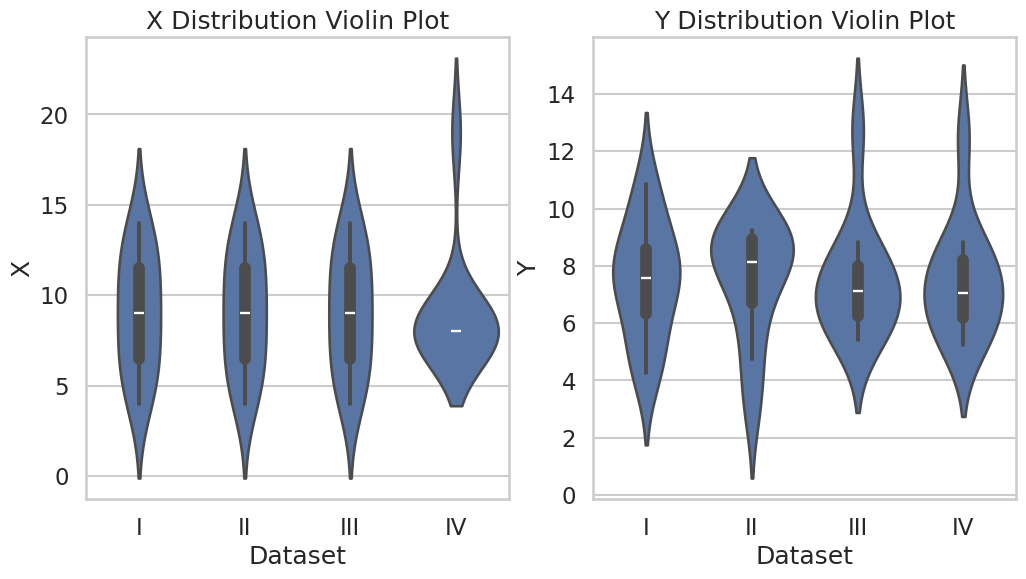

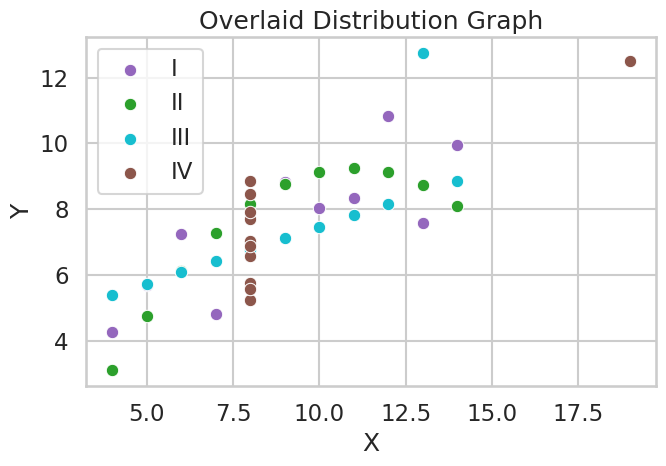

In [33]:
import pandas as pd 
import numpy as np
from pathlib import Path
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


DATA_PATH = Path("Anscombe_quartet_data - Anscombe_quartet_data.csv")

df = pd.read_csv('Anscombe_quartet_data - Anscombe_quartet_data.csv')

thedata = {
    'I': ('x123', 'y1'),
    'II': ('x123', 'y2'),
    'III': ('x123', 'y3'),
    'IV': ('x4', 'y4')
}

def stats_recap(df, x_col, y_col):
    
    x = df[x_col]
    y = df[y_col]

    n = len(x)
    mean_x = x.mean()
    mean_y = y.mean()
    var_x = x.var(ddof=1)
    var_y = y.var(ddof=1)
    std_x = x.std(ddof=1)
    std_y = y.std(ddof=1)
    cov_xy = x.cov(y)
    corr_xy = x.corr(y)
        
    X = sm.add_constant(x)
    fit = sm.OLS(y, X).fit()
    rslope = fit.params[x_col]
    intercept = fit.params['const']
    rsquare = fit.rsquared
        
    return pd.Series({
        'n': n,
        'mean_x': mean_x, 'mean_y': mean_y,
        'var_x': var_x, 'var_y': var_y,
        'std_x': std_x, 'std_y': std_y,
        'cov_xy': cov_xy, 'corr_xy': corr_xy,
        'slope': rslope, 'intercept': intercept, 'rsquare': rsquare
        })
        
recap_table = pd.DataFrame({
    name: stats_recap(df, x_col, y_col)
    for name, (x_col, y_col) in thedata.items()
}).T  

recap_rounded = recap_table.round(3)


print(recap_rounded)

def plottingtime(df, x_col, y_col, title):
    sns.set(style="whitegrid", context="talk")
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=x_col,y=y_col, data=df, s=80, color= "steelblue")
    sns.regplot(x=x_col, y=y_col, data=df, scatter=False, color="red", ci=None)
    plt.title(f"Anscombe Quartet {name}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.show()
   
for name, (x_col, y_col) in thedata.items():
    plottingtime(df, x_col, y_col, f"Anscombe Quartet {name}")
    
for name, (x_col, y_col) in thedata.items():
    x = df[x_col]
    y = df[y_col]
    
    XD = sm.add_constant(x)
    residualplt = sm.OLS(y, XD).fit()
    residualpredict = residualplt.predict(XD)
    
    residual = y - residualpredict
    
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=x, y=residual, s=70, color="green")
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals vs X For Dataset {name}')
    plt.xlabel(x_col)
    plt.ylabel("Residual")
    plt.tight_layout()
    plt.show()
    plt.close

    
bp_df = pd.DataFrame()

for name, (x_col, y_col) in thedata.items():
    bp_dataset = df[[x_col, y_col]].copy()
    bp_dataset['dataset'] = name
    bp_dataset.rename(columns={x_col: 'x', y_col: 'y'}, inplace= True)
    bp_df = pd.concat([bp_df, bp_dataset], ignore_index=True)

sns.set(style='whitegrid', context='talk')
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.boxplot(x='dataset', y= 'x', data = bp_df, ax=axes[0])
axes[0].set_title('X Distribution Boxplot')
axes[0].set_xlabel('Dataset')
axes[0].set_ylabel('X')

sns.boxplot(x='dataset', y='y', data = bp_df, ax=axes[1])
axes[1].set_title('Y Distribution Boxplot')
axes[1].set_xlabel('Dataset')
axes[1].set_ylabel('Y')

plt.tight_layout()
plt.show()

sns.set(style='whitegrid', context='talk')
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.violinplot(x='dataset', y= 'x', data = bp_df, ax=axes[0])
axes[0].set_title('X Distribution Violin Plot')
axes[0].set_xlabel('Dataset')
axes[0].set_ylabel('X')

sns.violinplot(x='dataset', y='y', data = bp_df, ax=axes[1])
axes[1].set_title('Y Distribution Violin Plot')
axes[1].set_xlabel('Dataset')
axes[1].set_ylabel('Y')

sns.set(style='whitegrid', context='talk')
graphcolors = ['tab:purple', 'tab:green', 'tab:cyan', 'tab:brown']
plt.figure(figsize=(7,5))

for i, (name, (x_col, y_col)) in enumerate(thedata.items()):
    sns.scatterplot(x=df[x_col], y=df[y_col], s=80, color=graphcolors[i], label=name)
plt.title('Overlaid Distribution Graph')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.tight_layout()
plt.show()